In [13]:


save_location =r''

# imports

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import wget


import os
from torch.nn import functional
from zipfile import ZipFile
import cv2

import tensorflow as tf
import keras.datasets
import pickle

In [3]:
# looks for files in a directory. there is code later for making LC for all files in dir, or single file

import os

dir = ''  
files = os.listdir(dir)

files_mtime = []

## Get the files and sort them by time

for f in files:
    if f[-3:-1] == 'pk':
        path = os.path.join(dir, f)
        mtime = os.path.getmtime(path)
        files_mtime.append((mtime, f))

files_mtime.sort(reverse=True)  
recent_files = [f for mtime, f in files_mtime]

for f in recent_files:
    print(f)

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-05_Adam_MSELoss()_Acc_0.24_0.125_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-05_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.83_0.438_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.3_0.208_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0005_Adam_MSELoss()_Acc_0.137_0.021_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0005_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.005_Adam_MSELoss()_Acc_0.112_0.125_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.005_Adam_MSELoss()_Acc_0.119_0.021_schholcompREF.pkl
forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-06_Adam_MSELoss()_Acc_0.13_0.125_schholcompREF.pkl
forest_Hype

In [6]:

# need to initialise model architecture to load in save file

class vgg16TorchNet(nn.Module):
    def __init__(self):
        super(vgg16TorchNet, self).__init__()
        self.flatten = nn.Flatten()
        
        self.conv_layers = nn.Sequential(  #
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =64, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
          )
        
        self.linear_1 = nn.Sequential(    #1x4096 and 512x100)
            nn.Linear(4096, 100), 
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,10),
            nn.Softmax(), 
  
        )

    def forward(self, x):
      x= self.conv_layers(x)
      x = x.flatten()
      x = x.squeeze()
      x = self.linear_1(x)
      return x



In [11]:
# load saved pickle model for graphs or further training
# this code is a pkl dictionary saved with the following dict elements

import pickle

file_name = ''

    
def load(file_name):
    
    print(save_location+f''+file_name)
    
    with open(save_location+f''+file_name, 'rb') as f:
        save_dict = pickle.load(f)

    # Access dictionary elements
    run_name = save_dict['Run'] 
    total_epochs = save_dict['Current Epoch']
    model_state_dict = save_dict['model.state_dict']
    training_samples = save_dict['training_samples'] 
    validation_samples = save_dict['validation_samples']

    t_loss_list = save_dict['t_loss_list'] 
    t_predict_list = save_dict['t_predict_list']
    t_accuracy_list = save_dict['t_accuracy_list']

    v_loss_list = save_dict['v_loss_list']
    v_predict_list = save_dict['v_predict_list']  
    v_accuracy_list = save_dict['v_accuracy_list']
    
    return run_name, total_epochs, model_state_dict, training_samples, validation_samples, t_loss_list, t_predict_list, t_accuracy_list, v_loss_list, v_predict_list, v_accuracy_list



In [5]:
# learning curve & accuracy curve functions
# requires the loss list for training and validation runs


import datetime
execution = datetime.datetime.now()

def learning_curve(v_loss_list, t_loss_list, run_name):
  plt.title(label="Learning Curve", fontsize =30)
  plt.plot(range(len(t_loss_list)), t_loss_list, label ='Training loss')
  plt.plot(range(len(v_loss_list)), v_loss_list, label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  # savefig assumes there is a folder named Graphs
  plt.savefig(save_location+ 'Graphs/' +'learningCuve'+run_name[0:20]+str(execution)+'.png') #run_name
  plt.show()
  # save figs

 
def accuracy_curve(v_accuracy_list, t_accuracy_list, run_name):
  plt.title(label="Accuracy Curve", fontsize =30)
  plt.plot(range(len(t_accuracy_list)), t_accuracy_list, label ='Training accuracy')
  plt.plot(range(len(v_accuracy_list)), v_accuracy_list, label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig(save_location+ 'Graphs/' +'accuracyCuve'+run_name[0:20]+str(execution)+'.png', format='png')
  plt.show()
 
def curves(v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list):
    # to print from LC and AC
    learning_curve(v_loss_list, t_loss_list, run_name)
    accuracy_curve(v_accuracy_list, t_accuracy_list, run_name)

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-05_Adam_MSELoss()_Acc_0.24_0.125_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-05_Adam_MSELoss()_Acc_0.24_0.125_schholcompREF.pkl


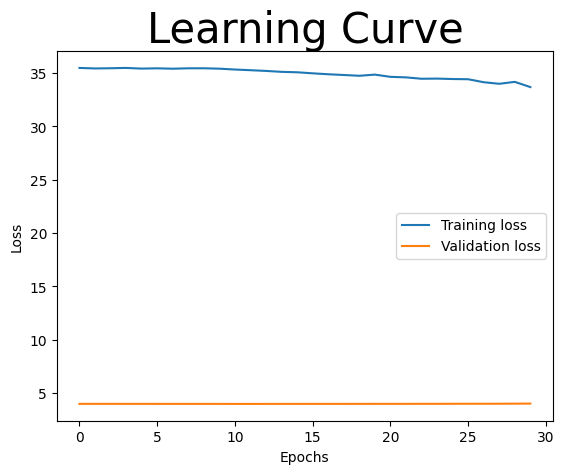

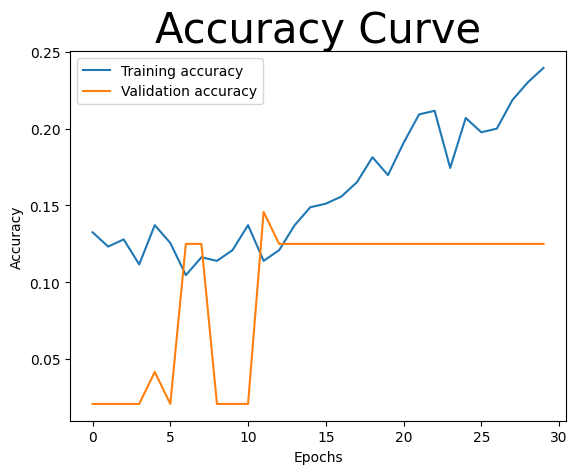

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-05_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-05_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl


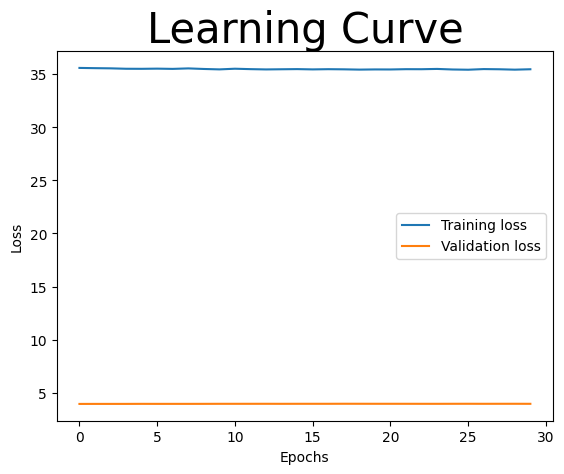

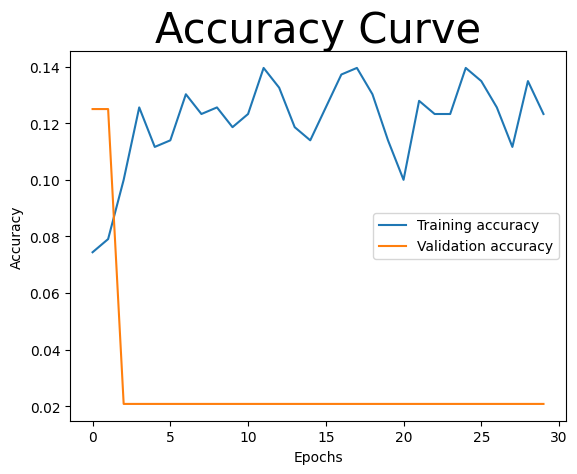

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.83_0.438_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.83_0.438_schholcompREF.pkl


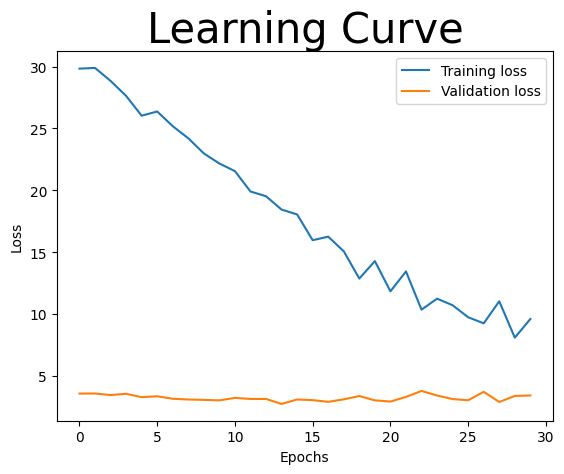

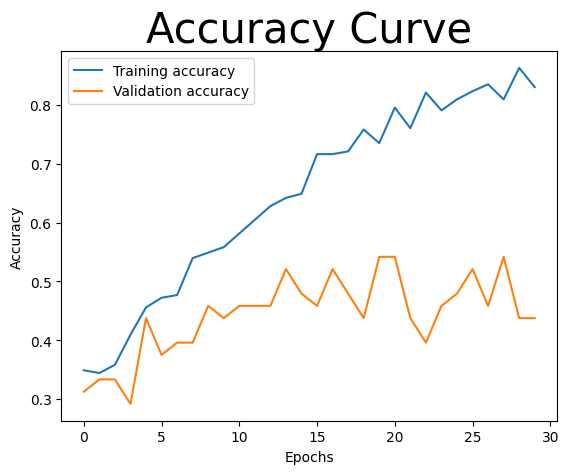

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.3_0.208_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.3_0.208_schholcompREF.pkl


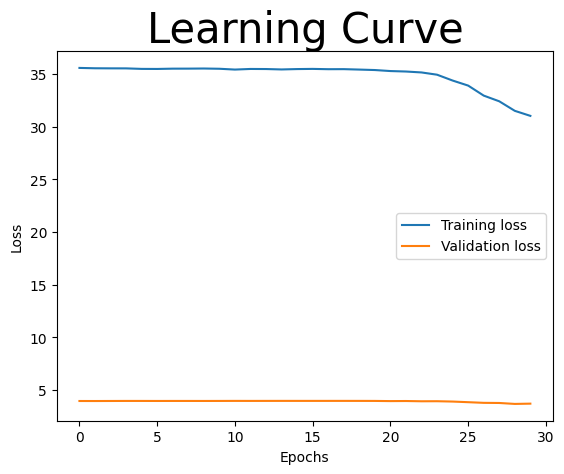

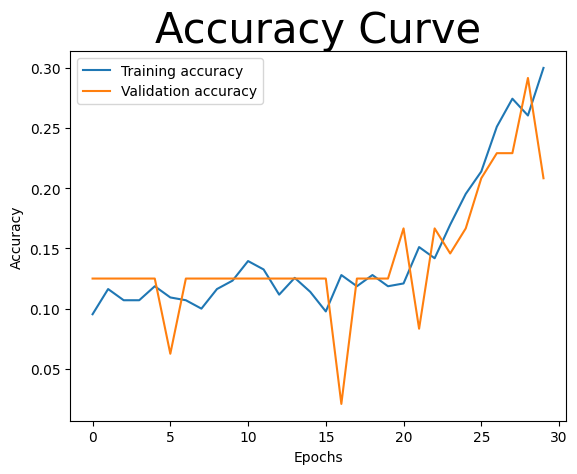

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0005_Adam_MSELoss()_Acc_0.137_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0005_Adam_MSELoss()_Acc_0.137_0.021_schholcompREF.pkl


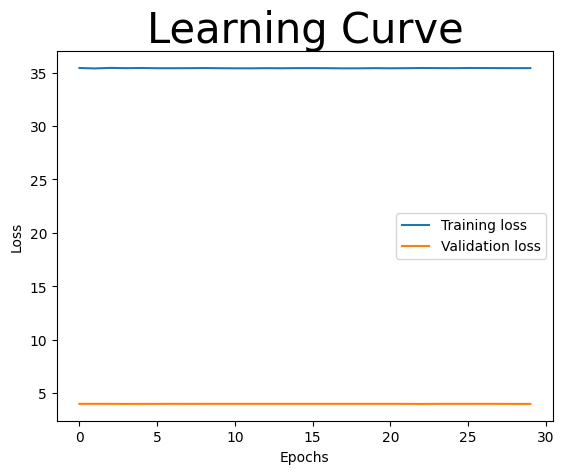

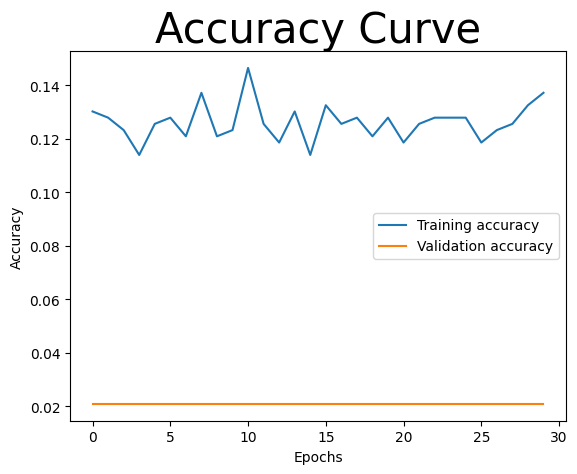

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0005_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0005_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl


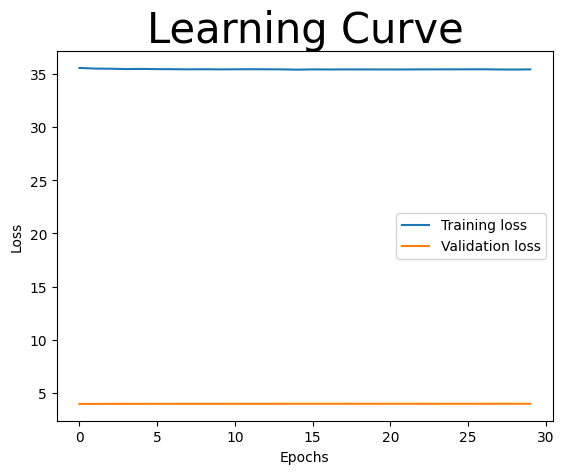

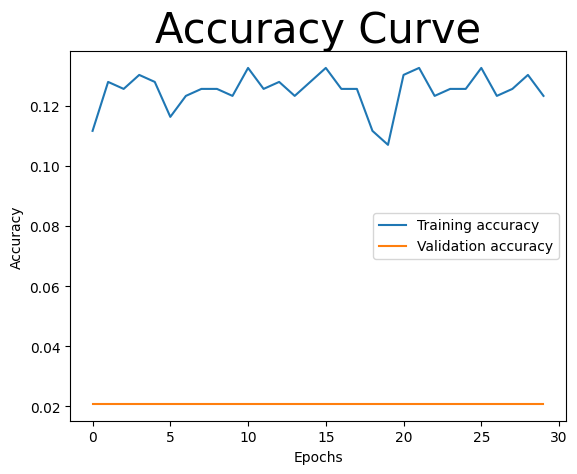

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.005_Adam_MSELoss()_Acc_0.112_0.125_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.005_Adam_MSELoss()_Acc_0.112_0.125_schholcompREF.pkl


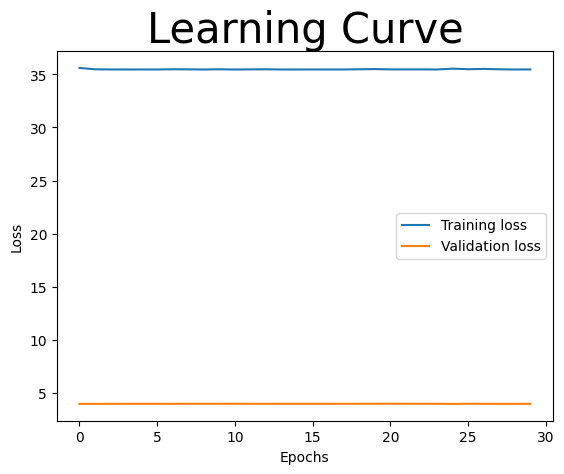

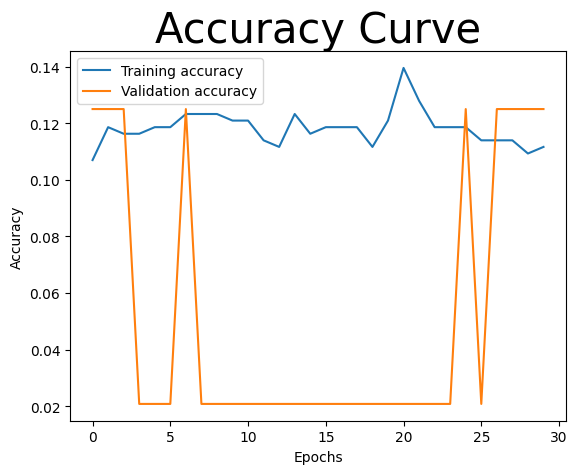

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.005_Adam_MSELoss()_Acc_0.119_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.005_Adam_MSELoss()_Acc_0.119_0.021_schholcompREF.pkl


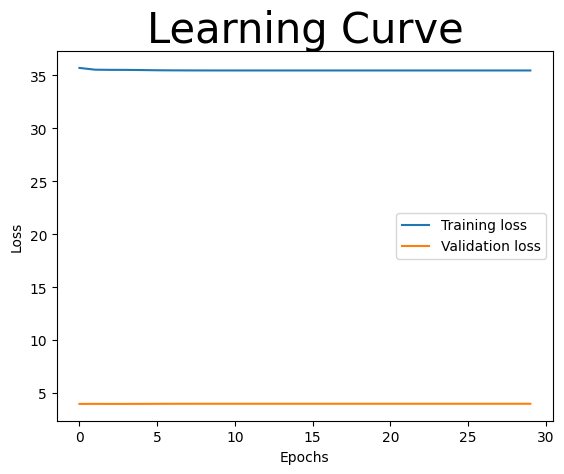

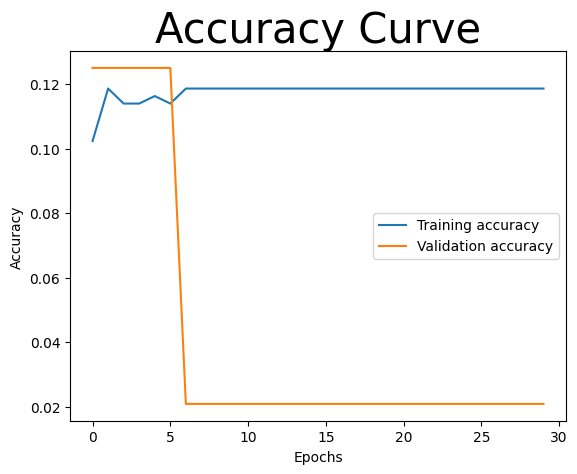

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-06_Adam_MSELoss()_Acc_0.13_0.125_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-06_Adam_MSELoss()_Acc_0.13_0.125_schholcompREF.pkl


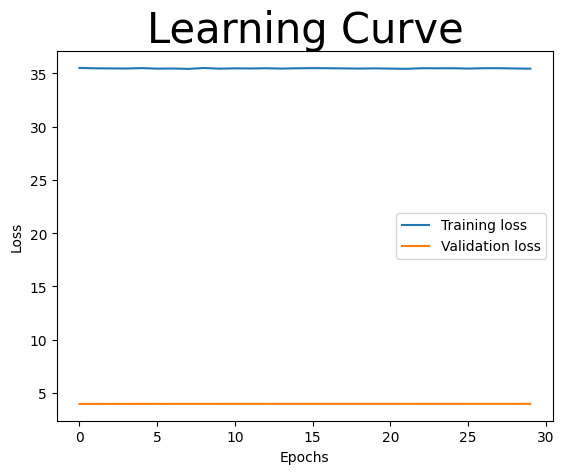

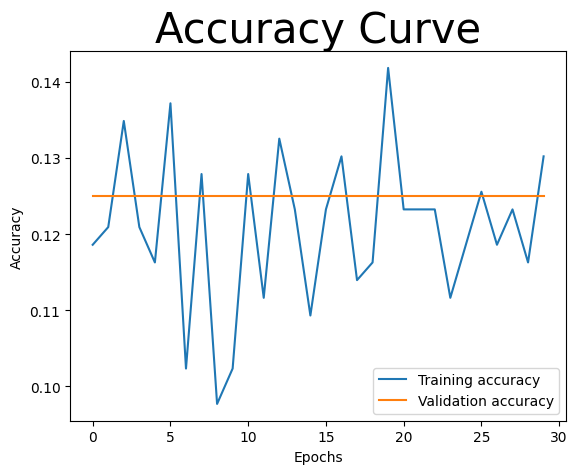

forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-06_Adam_MSELoss()_Acc_0.114_0.125_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr1e-06_Adam_MSELoss()_Acc_0.114_0.125_schholcompREF.pkl


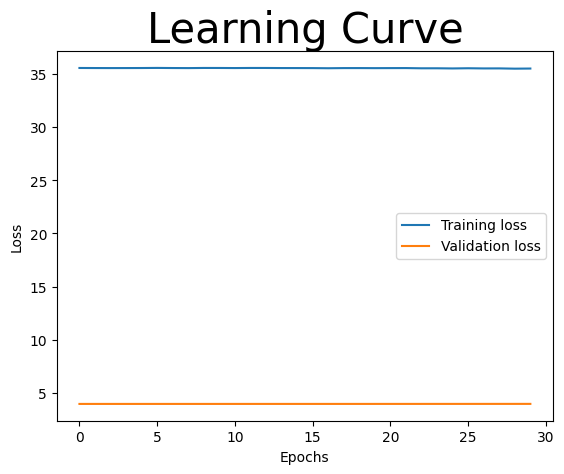

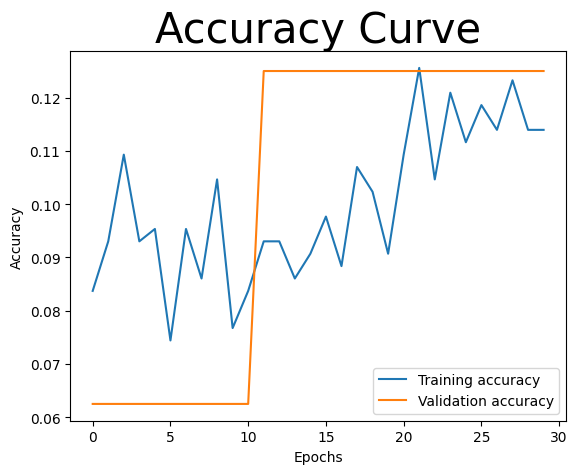

forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.0005_Adam_MSELoss()_Acc_0.137_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.0005_Adam_MSELoss()_Acc_0.137_0.021_schholcompREF.pkl


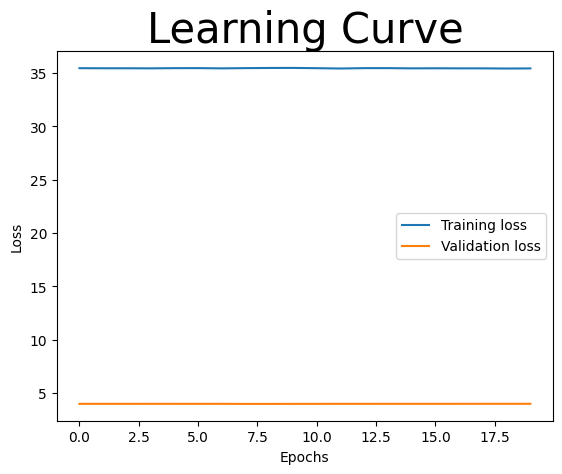

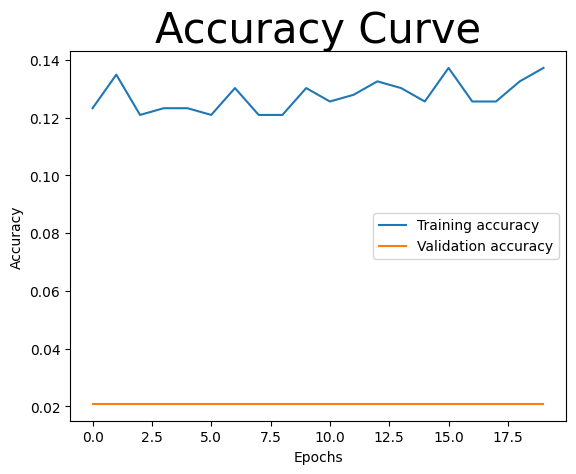

forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.0005_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.0005_Adam_MSELoss()_Acc_0.123_0.021_schholcompREF.pkl


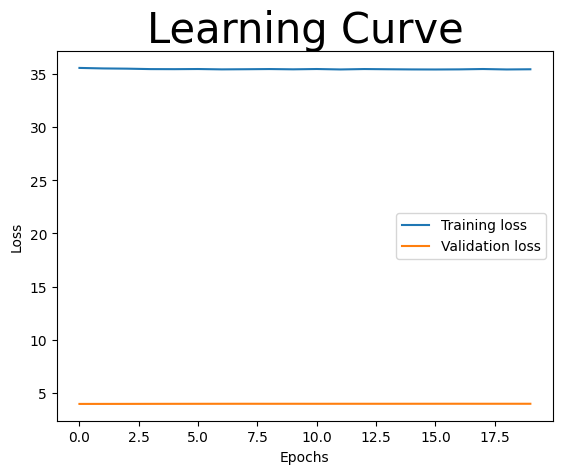

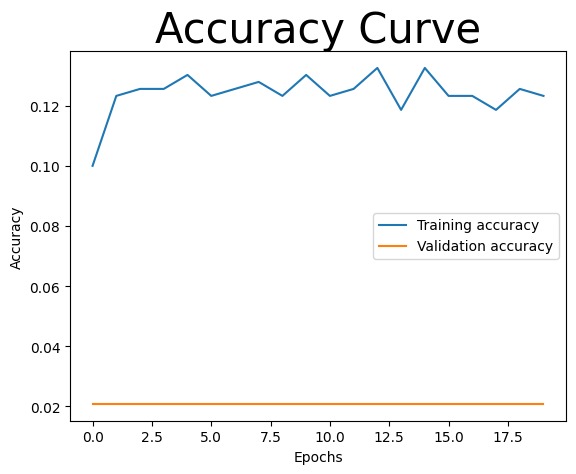

forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.005_Adam_MSELoss()_Acc_0.119_0.125_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.005_Adam_MSELoss()_Acc_0.119_0.125_schholcompREF.pkl


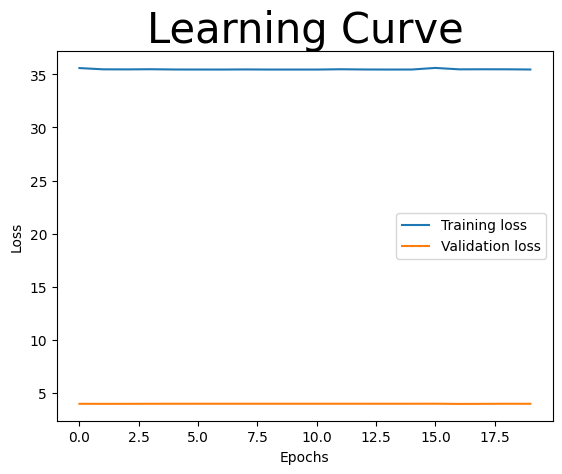

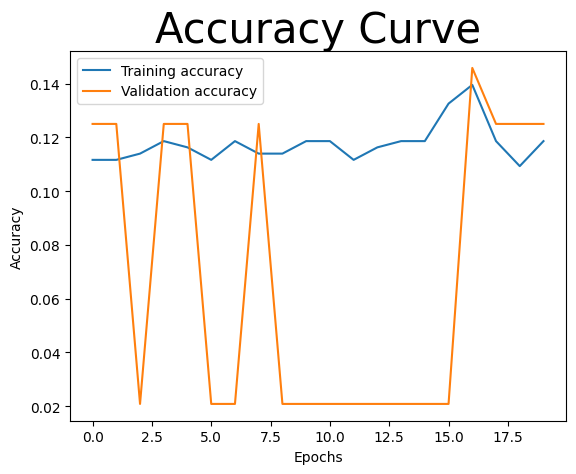

forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.005_Adam_MSELoss()_Acc_0.119_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v13_epoch20_lr0.005_Adam_MSELoss()_Acc_0.119_0.021_schholcompREF.pkl


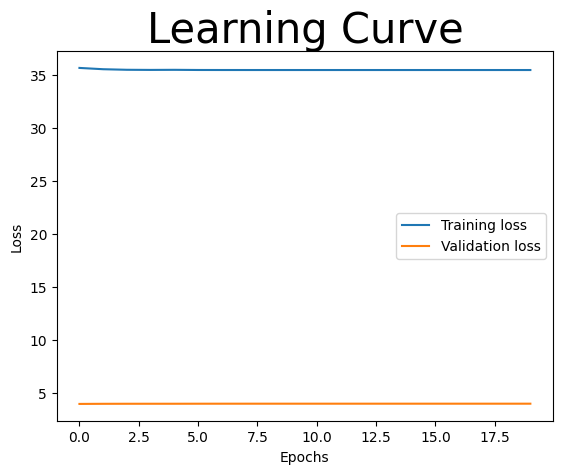

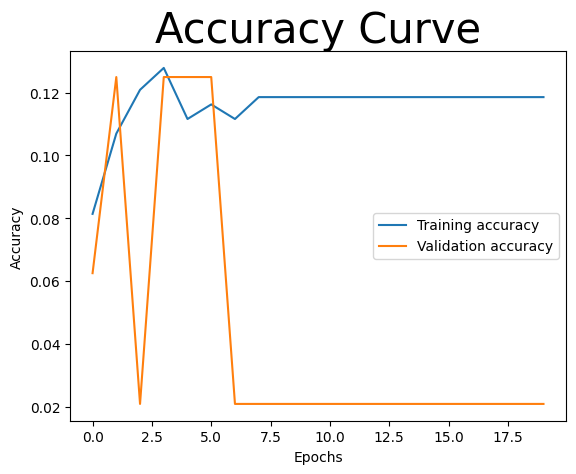

forest_HyperparameterSweep_280623_forest_v13_epoch20_lr1e-06_Adam_MSELoss()_Acc_0.128_0.021_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v13_epoch20_lr1e-06_Adam_MSELoss()_Acc_0.128_0.021_schholcompREF.pkl


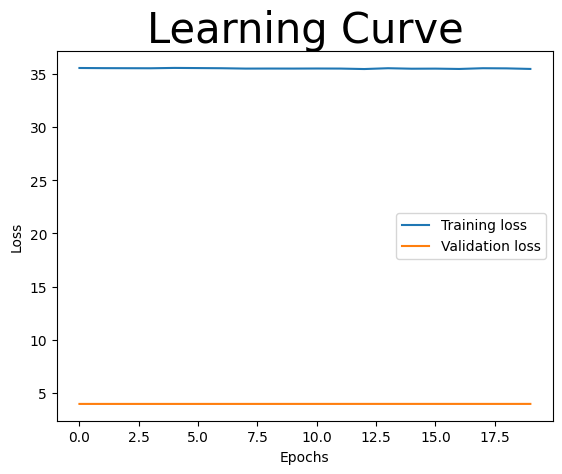

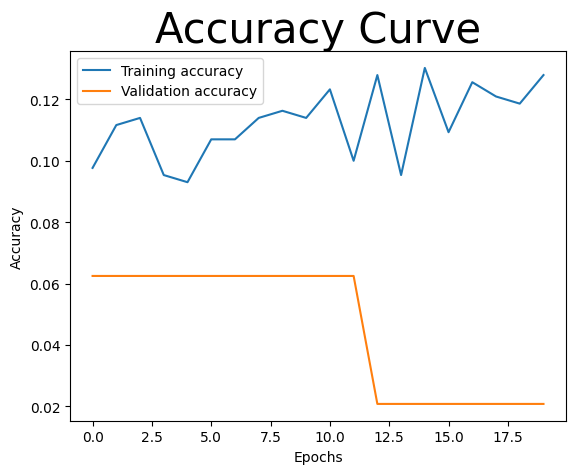

forest_HyperparameterSweep_280623_forest_v13_epoch20_lr1e-06_Adam_MSELoss()_Acc_0.093_0.062_schholcompREF.pkl
/its/home/nn268/AntQueen/classifier/saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v13_epoch20_lr1e-06_Adam_MSELoss()_Acc_0.093_0.062_schholcompREF.pkl


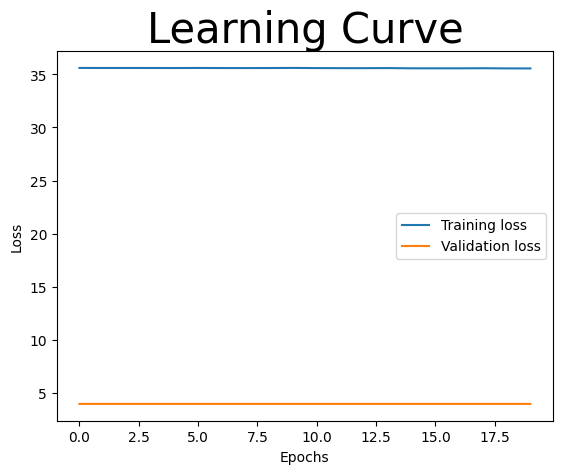

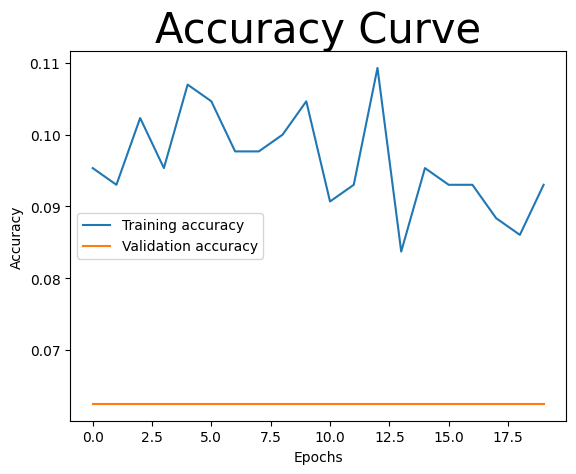

In [15]:
# load in multiple save files
for run in recent_files:
    #Load
    print(run)
    run_name, total_epochs, model_state_dict, training_samples, validation_samples, t_loss_list, t_predict_list, t_accuracy_list, v_loss_list, v_predict_list, v_accuracy_list = load(run)

In [9]:
# load single file
run ='' # enter file path and file name
run_name, total_epochs, model_state_dict, training_samples, validation_samples, t_loss_list, t_predict_list, t_accuracy_list, v_loss_list, v_predict_list, v_accuracy_list = load(run)

/its/home/nn268/AntQueen/Saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.83_0.438_schholcompREF.pkl


FileNotFoundError: [Errno 2] No such file or directory: '/its/home/nn268/AntQueen/Saves/280623/hyper_param/forest_HyperparameterSweep_280623_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.83_0.438_schholcompREF.pkl'

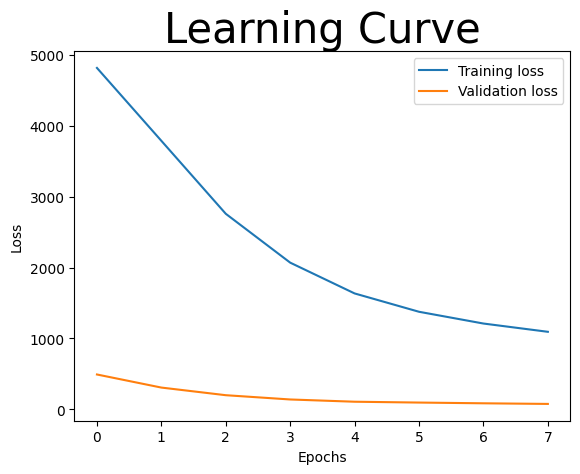

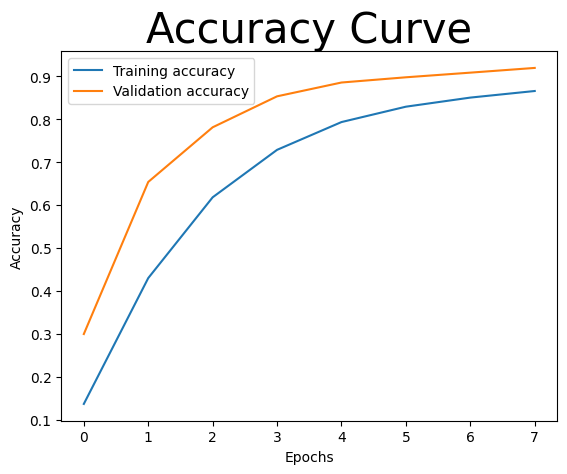

In [9]:
# produce graphs
curves(v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list)


 Training Confusion matrix


/tmp/ipykernel_187177/3207416136.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_predict_list = torch.tensor(t_predict_list)


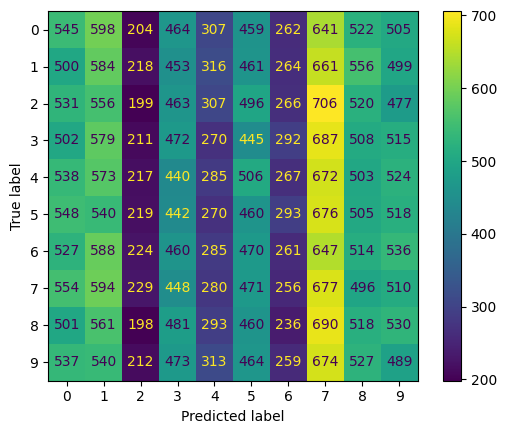


 Validation Confusion matrix


ValueError: Found input variables with inconsistent numbers of samples: [1569, 5000]

In [90]:
# confusion matrix
# requires the labels that correspond to predictions - does not work if used a random seed

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def label_tensor_float(lab):
    label = torch.tensor(lab)
    label = label.to(torch.float32)
    label = label.to(device)
    return label

def label_oh_tf(lab):
    num_classes = 10
    one_hot = np.zeros(num_classes)
    one_hot[lab] = 1
    label = torch.tensor(one_hot)
    label = label.to(torch.float32)
    label = label.to(device) #
    return label
"""    
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.1, train_size=0.9,
                                      random_state=random_seed, shuffle = True)"""


epoch_in_question =-1

# y needs to be a tensor
# so does t_predict_list
# then use the smaller sized variable to subset the larger

Y_train =label_tensor_float(y_train)
int_labels = Y_train.to(torch.int64) 
int_labels=Y_train.cpu()
t_predict_list_tensor = torch.tensor(t_predict_list)
int_labels_subset = int_labels[:45000]


print('\n Training Confusion matrix')
train_epoch_matrix = confusion_matrix(int_labels_subset, t_predict_list_tensor[epoch_in_question])
disp= ConfusionMatrixDisplay(train_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

print('\n Validation Confusion matrix')
val_epoch_matrix = confusion_matrix(y_val, v_predict_list[epoch_in_question])
disp= ConfusionMatrixDisplay(val_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()
